https://towardsdatascience.com/getting-to-know-the-mel-spectrogram-31bca3e2d9d0#:~:text=Compute%20FFT%20(Fast%20Fourier%20Transform,n_mels%3D128%20evenly%20spaced%20frequencies.

In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [3]:
filename = '../00-07-52_dur=600secs.wav'

y, sr = librosa.load(filename)
# trim silent edges
whale_song, _ = librosa.effects.trim(y)
Audio(data=whale_song, rate=sr)

/tmp/ipykernel_2987016/1068033621.py:3: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(filename)
/home/aic/anaconda3/lib/python3.11/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: '../../00-07-52_dur=600secs.wav'

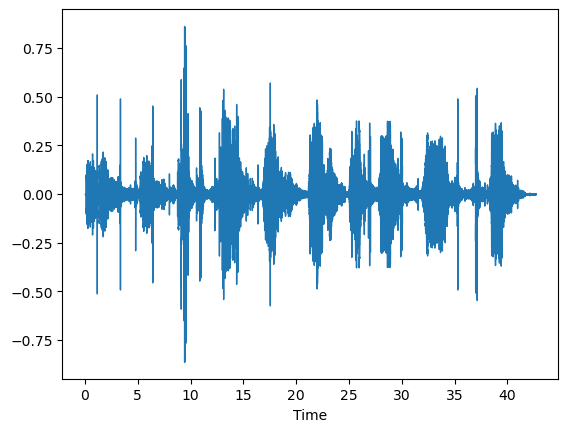

In [17]:
librosa.display.waveshow(whale_song, sr=sr);

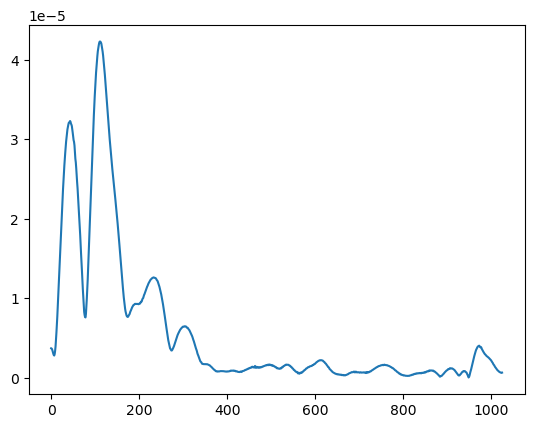

In [18]:
n_fft = 2048
D = np.abs(librosa.stft(whale_song[:n_fft], n_fft=n_fft, hop_length=n_fft+1))
plt.plot(D);

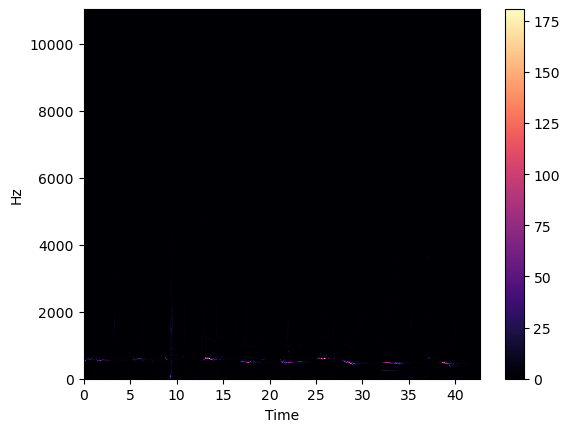

In [19]:
hop_length = 512
D = np.abs(librosa.stft(whale_song, n_fft=n_fft, hop_length=hop_length))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear');
plt.colorbar();

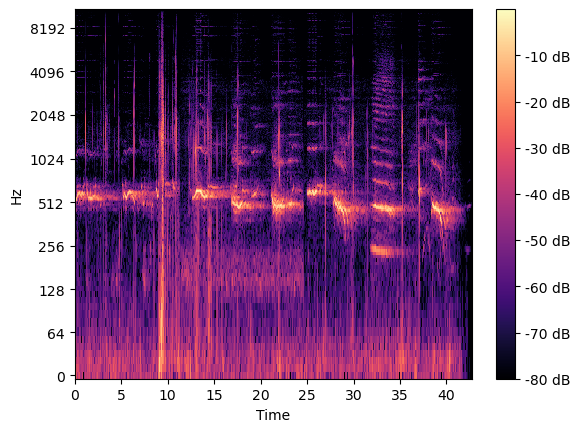

In [20]:
DB = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');